# **Data Loading and Inspection**

In [199]:
import pandas as pd

# Load dataset
file_path = '/content/dsa_job.xlsx'
df = pd.read_excel(file_path)

In [200]:
print(df.head())

   work_year                             job_title  job_category  \
0       2022  Machine Learning Engineer  in office      Analysis   
1       2020                Statistician  (Remote)         ML/AI   
2       2022             Machine Learning Engineer         ML/AI   
3       2022               Data Analyst  in office         ML/AI   
4       2020                          Statistician  Data Science   

  salary_currency  salary  salary_in_usd employee_residence experience_level  \
0             EUR  186597         136086                 US               MI   
1             JPY  110630          67982                 JP               EX   
2             INR   61280         153309                 UK               MI   
3             JPY  154130         135242                 DE               SE   
4             EUR  172312          35156                 UK               MI   

  employment_type work_setting company_location company_size  
0              CT       Remote               DE

In [201]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB
None


In [202]:
print(df.describe())

        work_year         salary  salary_in_usd
count  5000.00000    5000.000000    5000.000000
mean   2020.97680  102046.307200  114076.995800
std       0.81951   70853.626492   49113.807687
min    2020.00000 -198754.000000   30016.000000
25%    2020.00000   64295.500000   71343.750000
50%    2021.00000  110636.000000  114167.000000
75%    2022.00000  153104.750000  156665.750000
max    2022.00000  199924.000000  199985.000000


**Identify Missing or Inconsistent Values**

In [203]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Check for unique values in categorical columns for inconsistencies
categorical_columns = ['job_title', 'job_category', 'salary_currency',
                       'employee_residence', 'experience_level',
                       'employment_type', 'work_setting', 'company_location', 'company_size']

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Missing Values:
work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

Duplicate Rows: 0

Unique values in job_title:
['Machine Learning Engineer  in office' 'Statistician  (Remote)'
 'Machine Learning Engineer' 'Data Analyst  in office' 'Statistician'
 'Data Scientist  (Remote)' 'Data Analyst' 'Data Engineer  in office'
 'Data Scientist' 'Machine Learning Engineer  (Remote)' 'Data Engineer'
 'Data Engineer  (Remote)' 'Data Scientist  in office'
 'Data Analyst  (Remote)' 'Statistician  in office']

Unique values in job_category:
['Analysis' 'ML/AI' 'Data Science' 'Engineering' nan]

Unique values in salary_currency:
['EUR' 'JPY' 'INR' nan 'us dolars' 'GBP']

Unique values in employee_residence:
['US' 'JP' 'UK' 'DE' 'CN'

# **Data Cleaning**

**Convert Data Types Where Necessary**

In [204]:
# Convert work_year to integer
df['work_year'] = df['work_year'].astype(int)

# Convert categorical columns to 'category' type
categorical_columns = ['job_title', 'job_category', 'salary_currency',
                       'employee_residence', 'experience_level',
                       'employment_type', 'work_setting', 'company_location', 'company_size']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Ensure salary and salary_in_usd are numeric
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')


**Handle Missing Values**

In [205]:
# Analyze job_category based on job_title
print("Job Category by Job Title:")
print(df.groupby('job_title')['job_category'].value_counts())

# Analyze salary_currency based on employee_residence or company_location
print("\nSalary Currency by Employee Residence:")
print(df.groupby('employee_residence')['salary_currency'].value_counts())

print("\nSalary Currency by Company Location:")
print(df.groupby('company_location')['salary_currency'].value_counts())

# Analyze experience_level based on job_title
print("\nExperience Level by Job Title:")
print(df.groupby('job_title')['experience_level'].value_counts())

# Analyze company_size based on company_location
print("\nCompany Size by Company Location:")
print(df.groupby('company_location')['company_size'].value_counts())


Job Category by Job Title:
job_title                             job_category
Data Analyst                          Data Science     78
                                      ML/AI            72
                                      Analysis         70
                                      Engineering      62
Data Analyst  (Remote)                Engineering      78
                                      Data Science     77
                                      ML/AI            76
                                      Analysis         72
Data Analyst  in office               Data Science     90
                                      ML/AI            85
                                      Engineering      70
                                      Analysis         68
Data Engineer                         Analysis         85
                                      Data Science     84
                                      ML/AI            82
                                      Engineering   

<ipython-input-205-bcfccfd72047>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('job_title')['job_category'].value_counts())
<ipython-input-205-bcfccfd72047>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('employee_residence')['salary_currency'].value_counts())
<ipython-input-205-bcfccfd72047>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('company_location')['sal

In [206]:
# Impute job_category based on job_title
df['job_category'] = df.groupby('job_title')['job_category'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


<ipython-input-206-7cd100b30d09>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['job_category'] = df.groupby('job_title')['job_category'].transform(


In [207]:
# Impute salary_currency based on employee_residence
df['salary_currency'] = df.groupby('employee_residence')['salary_currency'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


<ipython-input-207-5679dd84ff10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['salary_currency'] = df.groupby('employee_residence')['salary_currency'].transform(


In [208]:
# Impute experience_level based on job_title
df['experience_level'] = df.groupby('job_title')['experience_level'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


<ipython-input-208-b5e3485a2c63>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['experience_level'] = df.groupby('job_title')['experience_level'].transform(


In [209]:
# Impute company_size based on company_location
df['company_size'] = df.groupby('company_location')['company_size'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)


<ipython-input-209-23d3feb8c0b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['company_size'] = df.groupby('company_location')['company_size'].transform(


In [210]:
# Check for remaining missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64


In [211]:
# Standardize job_title by removing text in parentheses and trimming whitespace
df['job_title'] = df['job_title'].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()


In [212]:
# Display unique values after cleaning
print("Unique job titles before cleaning:")
print(df['job_title'].unique())

Unique job titles before cleaning:
['Machine Learning Engineer  in office' 'Statistician'
 'Machine Learning Engineer' 'Data Analyst  in office' 'Data Scientist'
 'Data Analyst' 'Data Engineer  in office' 'Data Engineer'
 'Data Scientist  in office' 'Statistician  in office']


In [213]:
def clean_job_title(title):
    # Remove leading and trailing spaces, convert to lowercase
    title = title.strip().lower()

    # Standardize descriptors
    title = title.replace(" in office", "(in-office)")
    title = title.replace(" (remote)", "(remote)")

    # Remove descriptors like "(in-office)" or "(remote)" for mapping
    base_title = title.split(" (")[0].strip()

    # Map to common job categories
    job_mapping = {
        "machine learning engineer": "Machine Learning Engineer",
        "data scientist": "Data Scientist",
        "data analyst": "Data Analyst",
        "data engineer": "Data Engineer",
        "statistician": "Statistician"
    }
    return job_mapping.get(base_title, base_title)  # Fallback to cleaned base title

# Apply the cleaning function to the job_title column
df['job_title'] = df['job_title'].apply(clean_job_title)

# Display unique values after cleaning
print("Unique job titles after cleaning:")
print(df['job_title'].unique())

Unique job titles after cleaning:
['Machine Learning Engineer' 'Statistician' 'Data Analyst'
 'Data Scientist' 'Data Engineer']


In [214]:
# Standardize categorical columns to uppercase
text_columns = ['job_title', 'job_category', 'experience_level', 'employment_type', 'work_setting', 'company_size']
for col in text_columns:
    df.loc[:, col] = df[col].str.upper()

# experience level has consistent values
experience_levels = ['MI', 'SE', 'CT']
df = df[df['experience_level'].isin(experience_levels)].copy()

# Standardize salary_currency
df.loc[:, 'salary_currency'] = df['salary_currency'].str.upper()


<ipython-input-214-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['ANALYSIS' 'ML/AI' 'ML/AI' ... 'ANALYSIS' 'DATA SCIENCE' 'ENGINEERING']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-214-50b93d7063cd>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['REMOTE' 'REMOTE' 'HYBRID' ... 'HYBRID' 'REMOTE' 'REMOTE']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].str.upper()
<ipython-input-214-50b93d7063cd>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['EUR' 'INR' 'JPY' ... 'EUR' 'GBP' 'EUR']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df.loc[:,

In [215]:
print(df['salary_currency'].unique())

['EUR' 'INR' 'JPY' 'US DOLARS' 'GBP']


In [216]:
# Replace 'US DOLARS' with 'USD'
df['salary_currency'] = df['salary_currency'].str.upper().str.strip()  # Ensure all are uppercase and no extra spaces
df['salary_currency'] = df['salary_currency'].replace({'US DOLARS': 'USD'})

# Check unique values after replacement
print("Unique salary currencies after cleaning:")
print(df['salary_currency'].unique())

Unique salary currencies after cleaning:
['EUR' 'INR' 'JPY' 'USD' 'GBP']


In [217]:
print("Available columns in the DataFrame:")
print(df.columns)


Available columns in the DataFrame:
Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')


In [218]:
print(df['job_title'].unique())
print(df['job_category'].unique())
print(df['salary_currency'].unique())
print(df['salary'].unique())
print(df['salary_in_usd'].unique())
print(df['employee_residence'].unique())
print(df['experience_level'].unique())
print(df['employment_type'].unique())
print(df['work_setting'].unique())
print(df['company_location'].unique())
print(df['company_size'].unique())

['MACHINE LEARNING ENGINEER' 'DATA ANALYST' 'STATISTICIAN' 'DATA ENGINEER'
 'DATA SCIENTIST']
['ANALYSIS' 'ML/AI' 'DATA SCIENCE' 'ENGINEERING']
['EUR' 'INR' 'JPY' 'USD' 'GBP']
[186597  61280 154130 ...  44674 115923  58037]
[136086 153309 135242 ... 100031  40047 181817]
['US', 'UK', 'DE', 'CN', 'JP', 'MX', 'IN']
Categories (7, object): ['CN', 'DE', 'IN', 'JP', 'MX', 'UK', 'US']
['MI', 'SE']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
['CT', 'FT', 'FL', 'PT']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']
['REMOTE' 'HYBRID' 'IN-PERSON']
['DE', 'CN', 'MX', 'UK', 'US', 'JP', 'IN']
Categories (7, object): ['CN', 'DE', 'IN', 'JP', 'MX', 'UK', 'US']
['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']


**Check and Handle Outliers**

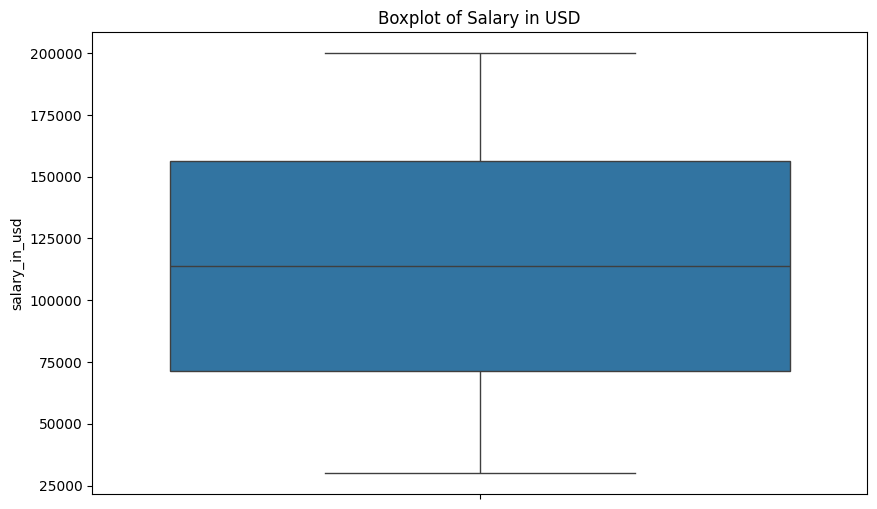

Number of outliers in 'salary_in_usd': 0
<class 'pandas.core.frame.DataFrame'>
Index: 2483 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2483 non-null   int64   
 1   job_title           2483 non-null   object  
 2   job_category        2483 non-null   object  
 3   salary_currency     2483 non-null   object  
 4   salary              2483 non-null   int64   
 5   salary_in_usd       2483 non-null   int64   
 6   employee_residence  2483 non-null   category
 7   experience_level    2483 non-null   category
 8   employment_type     2483 non-null   category
 9   work_setting        2483 non-null   object  
 10  company_location    2483 non-null   category
 11  company_size        2483 non-null   category
dtypes: category(5), int64(3), object(4)
memory usage: 168.5+ KB
Data summary after cleaning:
 None
Descriptive statistics after cleaning:
          work_yea

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot salary_in_usd distribution to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='salary_in_usd')
plt.title('Boxplot of Salary in USD')
plt.show()

# Detect outliers using the IQR method
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"Number of outliers in 'salary_in_usd': {outliers.shape[0]}")

# Remove outliers
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Verify the cleaned data
print("Data summary after cleaning:\n", df.info())
print("Descriptive statistics after cleaning:\n", df.describe())

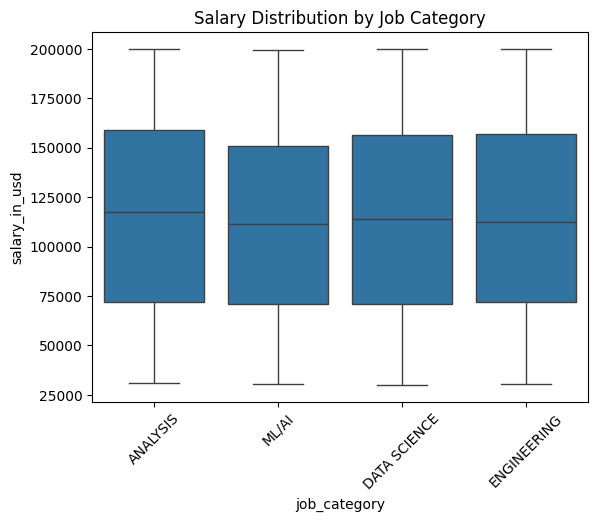

In [220]:
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()


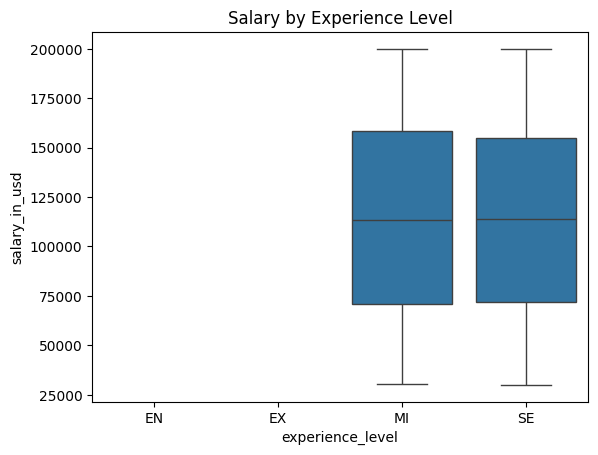

In [221]:
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary by Experience Level')
plt.show()


# **Exploratory Data Analysis (EDA)**

In [222]:
# Summary statistics for numerical columns
print(df[['salary', 'salary_in_usd']].describe())

# Unique values in categorical columns
for col in ['job_category', 'experience_level', 'work_setting', 'company_size']:
    print(f"Unique values in {col}: {df[col].unique()}")


              salary  salary_in_usd
count    2483.000000    2483.000000
mean   102866.494966  113591.142972
std     68582.908337   49223.246953
min   -198501.000000   30016.000000
25%     63631.000000   71176.500000
50%    109946.000000  113737.000000
75%    153290.000000  156177.000000
max    199823.000000  199964.000000
Unique values in job_category: ['ANALYSIS' 'ML/AI' 'DATA SCIENCE' 'ENGINEERING']
Unique values in experience_level: ['MI', 'SE']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']
Unique values in work_setting: ['REMOTE' 'HYBRID' 'IN-PERSON']
Unique values in company_size: ['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']


In [223]:
# Filter out rows with invalid salary values
df = df[df['salary'] >= 0]


**Visualizations**

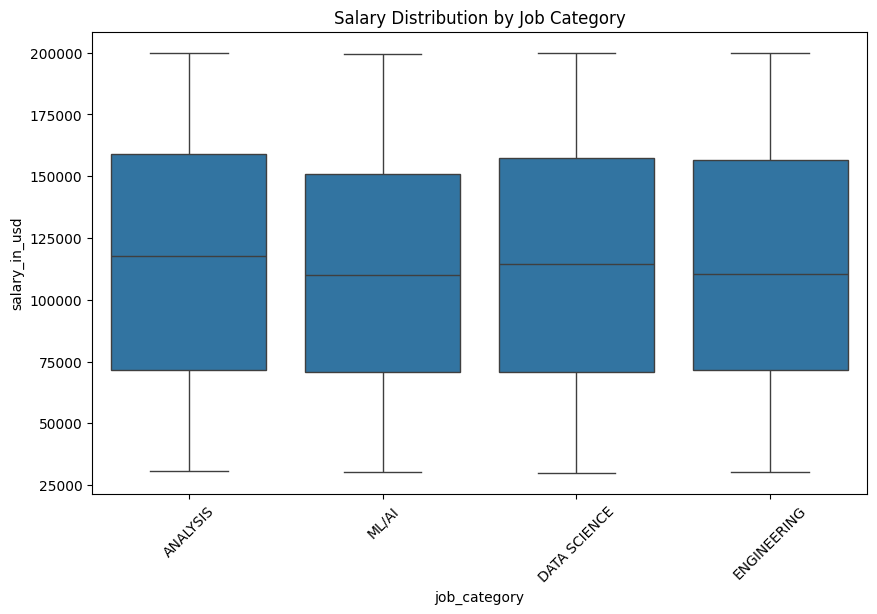

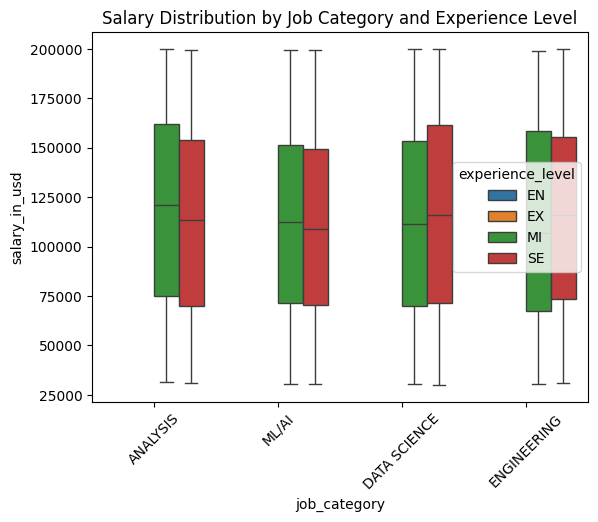

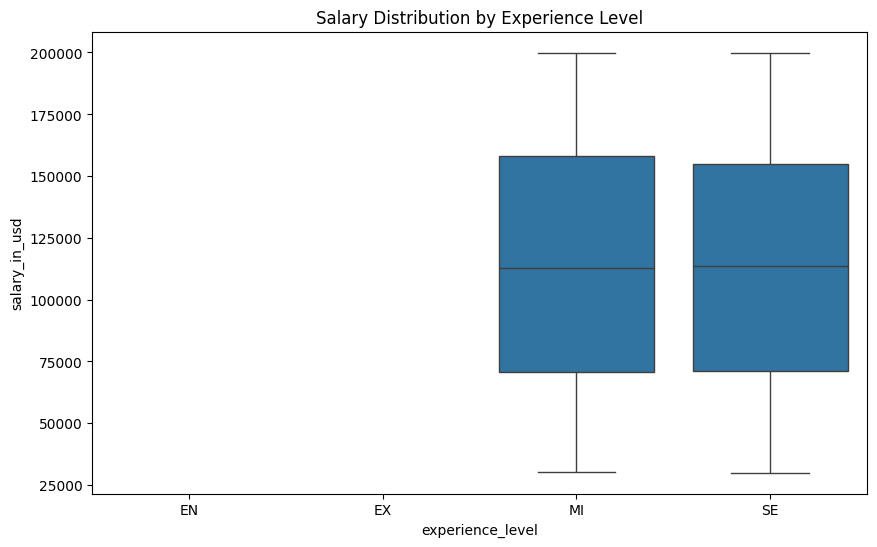

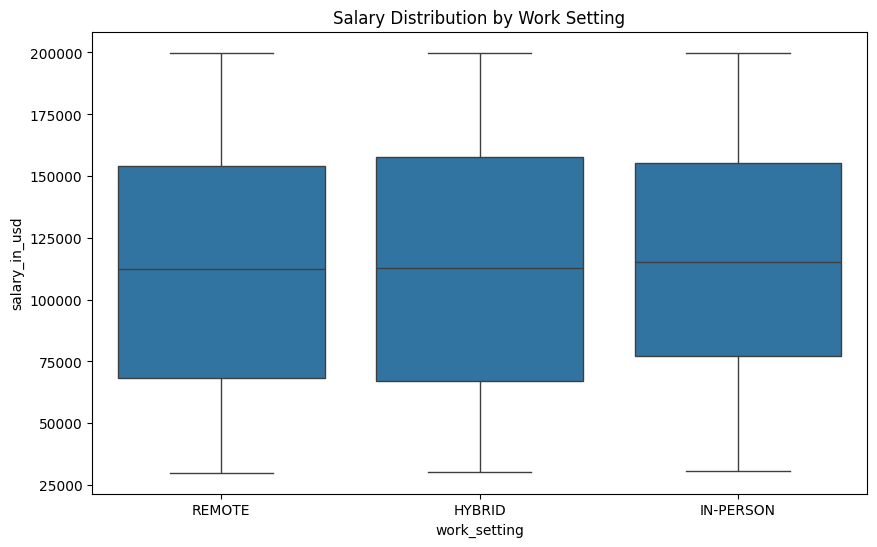

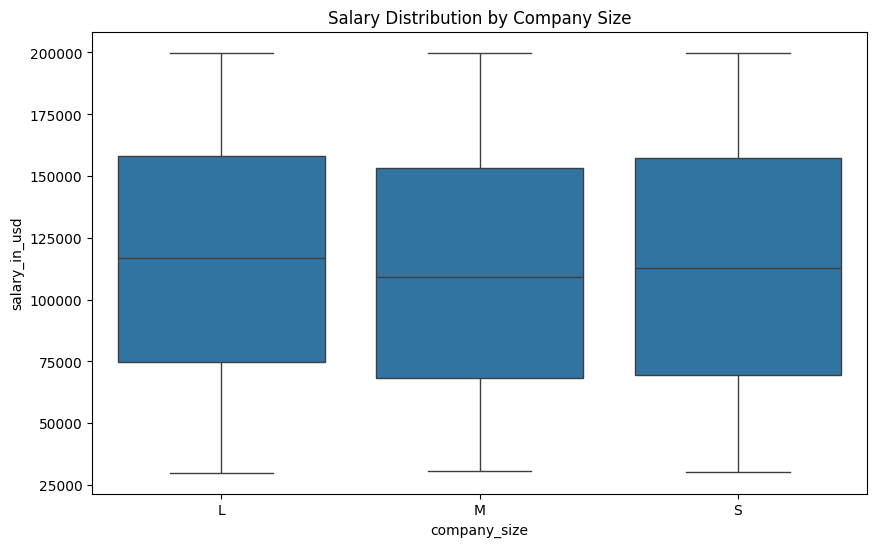

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary distribution by job category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='job_category', y='salary_in_usd', hue='experience_level')
plt.title('Salary Distribution by Job Category and Experience Level')
plt.xticks(rotation=45)
plt.show()


# Salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.show()

# Salary distribution by work setting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()

# Salary distribution by company size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Correlation Analysis**

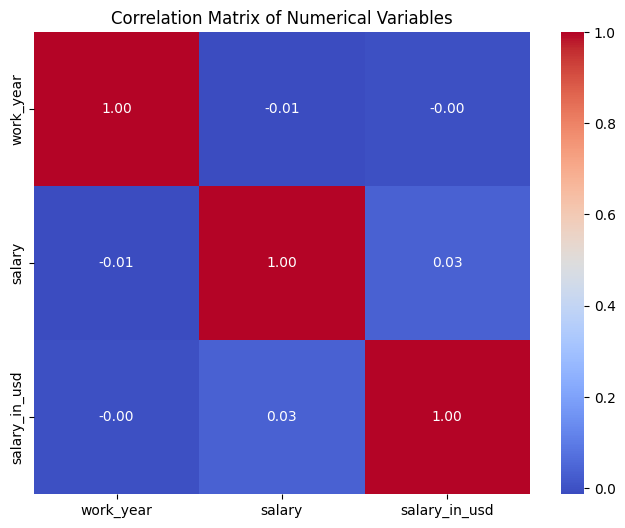

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numerical columns to avoid an empty plot
if not numeric_df.empty:
    # Correlation matrix for numerical variables
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Variables')
    plt.show()
else:
    print("No numerical columns available for correlation analysis.")


**Distribution Analysis**

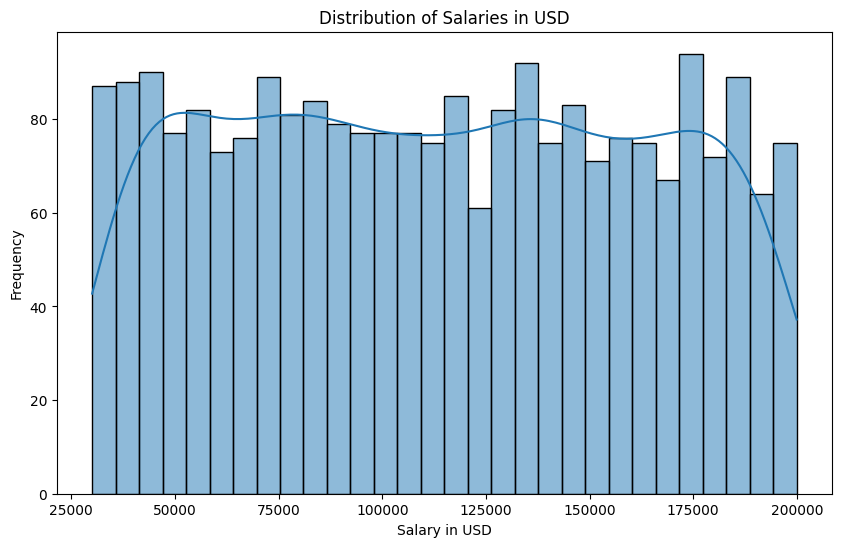

In [226]:
# Histogram and KDE of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


**Analysis by Year**

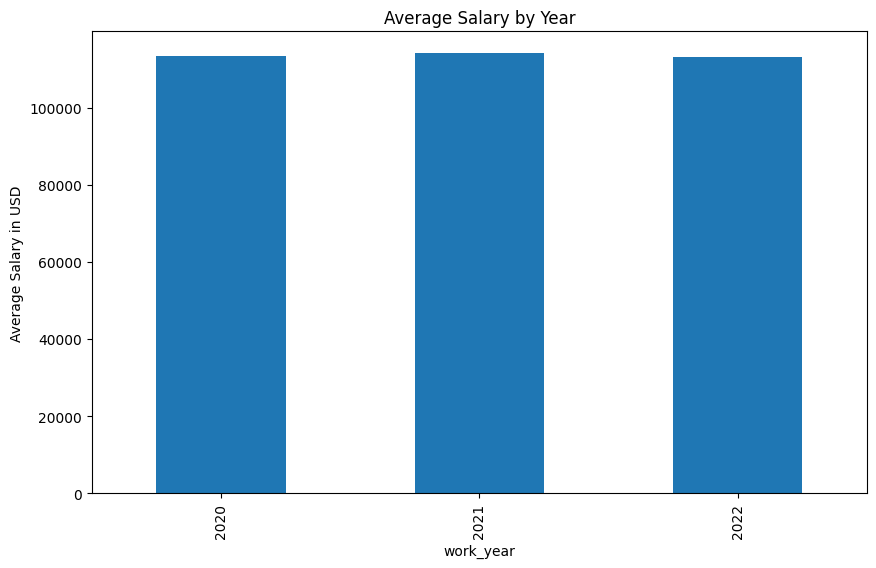

In [227]:
# Average salary by work year
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_by_year.plot(kind='bar', figsize=(10, 6), title='Average Salary by Year', ylabel='Average Salary in USD')
plt.show()


**Experience Level and Salary Analysis**

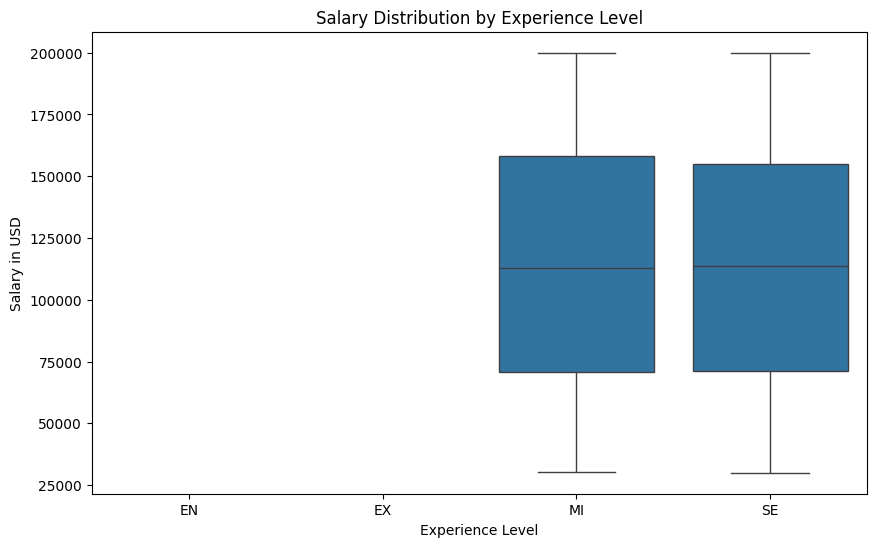

In [228]:
# Boxplot of salary by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


**Location-Based Analysis**

<ipython-input-229-8b4fab6489bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


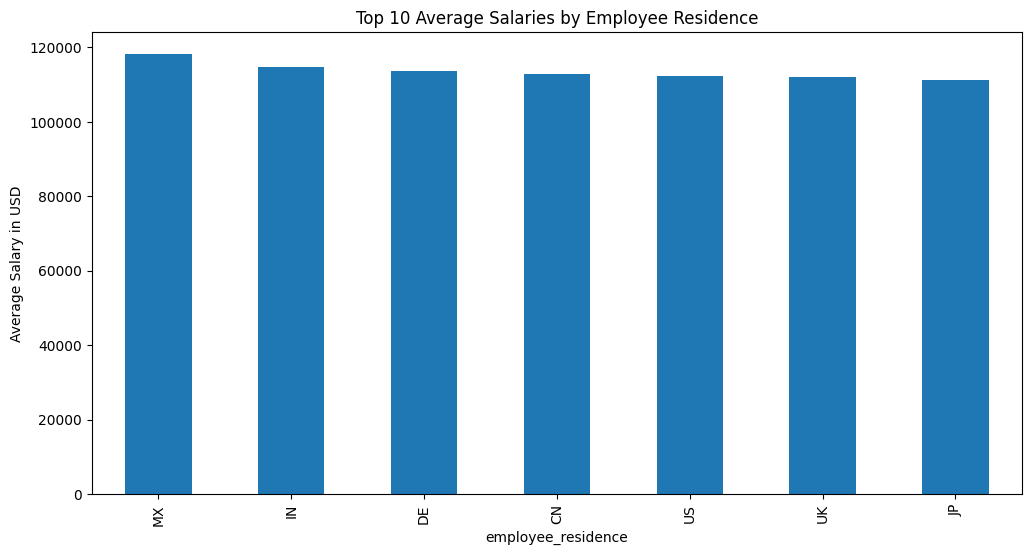

In [229]:
# Average salary by employee residence
avg_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
avg_salary_by_residence.plot(kind='bar', figsize=(12, 6), title='Top 10 Average Salaries by Employee Residence')
plt.ylabel('Average Salary in USD')
plt.show()


**Job Category Analysis**

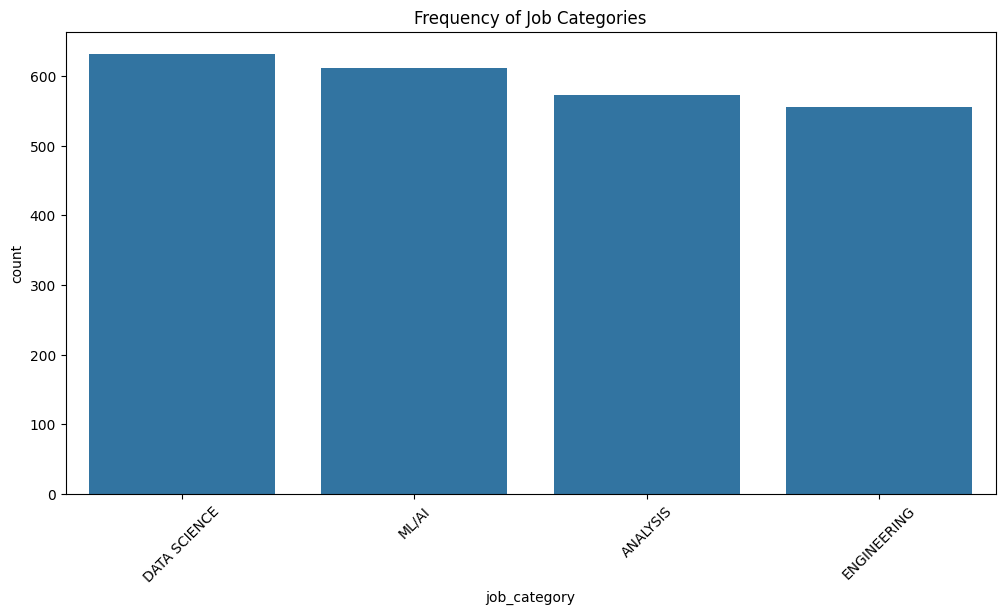

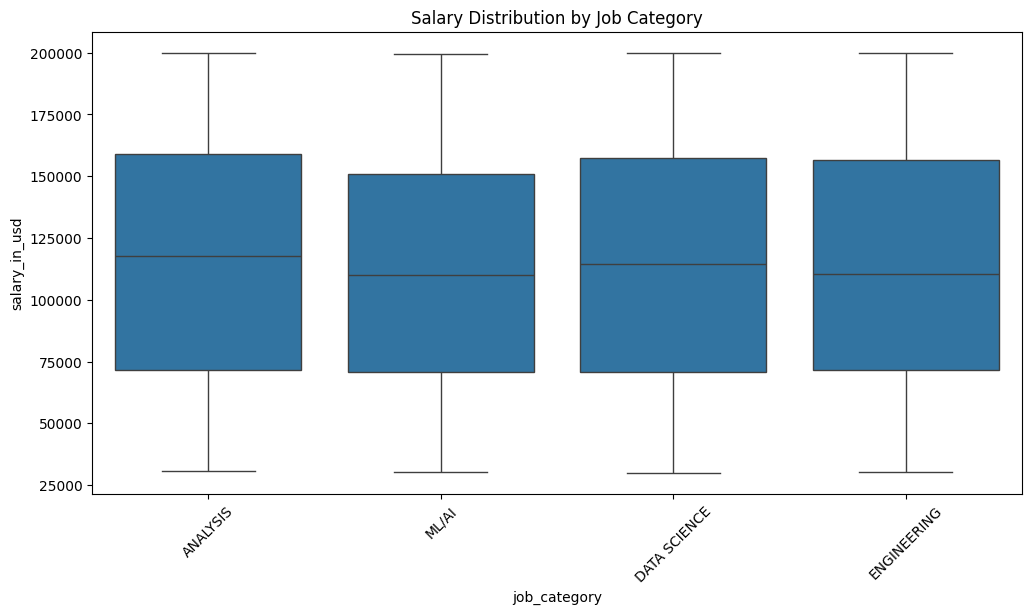

In [230]:
# Countplot for job categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job_category', order=df['job_category'].value_counts().index)
plt.title('Frequency of Job Categories')
plt.xticks(rotation=45)
plt.show()

# Boxplot of salary by job category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()


**Employment Type and Work Setting Analysis**

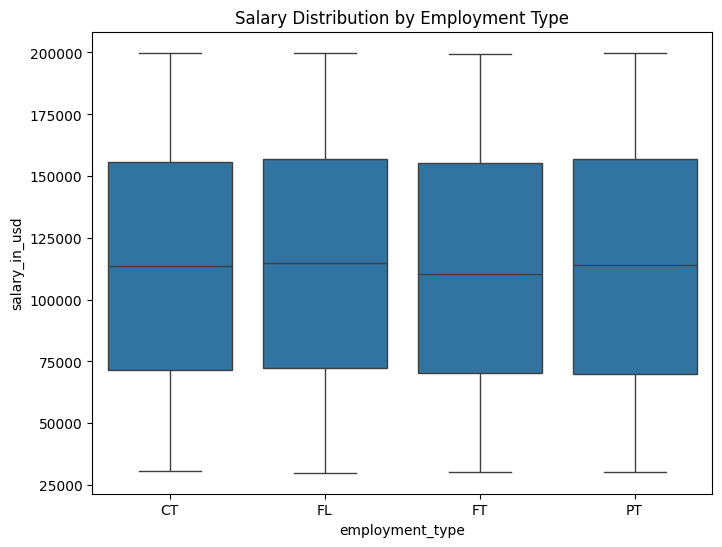

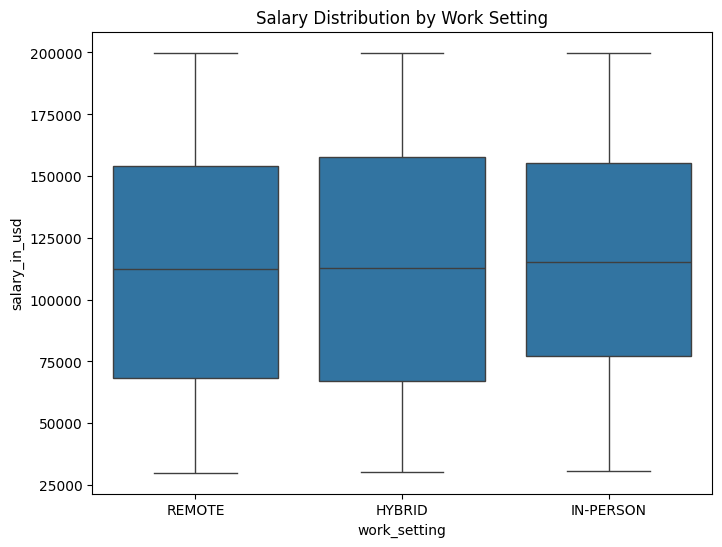

In [231]:
# Salary by employment type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution by Employment Type')
plt.show()

# Salary by work setting
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.show()


**Company Size Analysis**

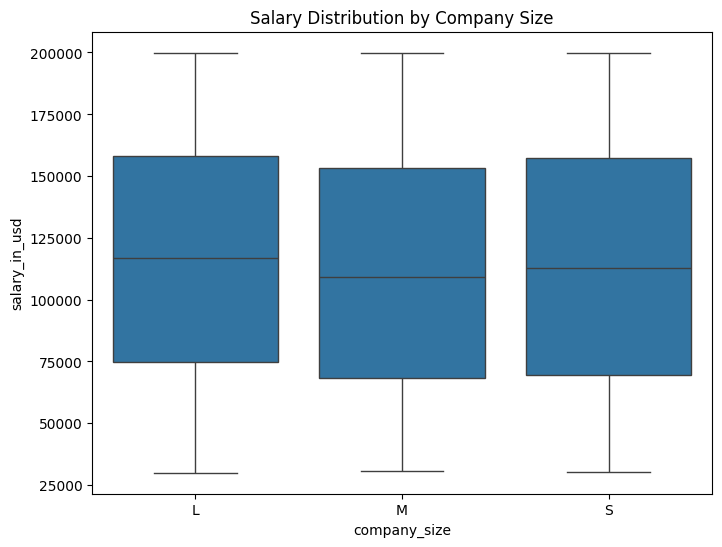

In [232]:
# Boxplot of salary by company size
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.show()


**Top Job Titles by Salary**

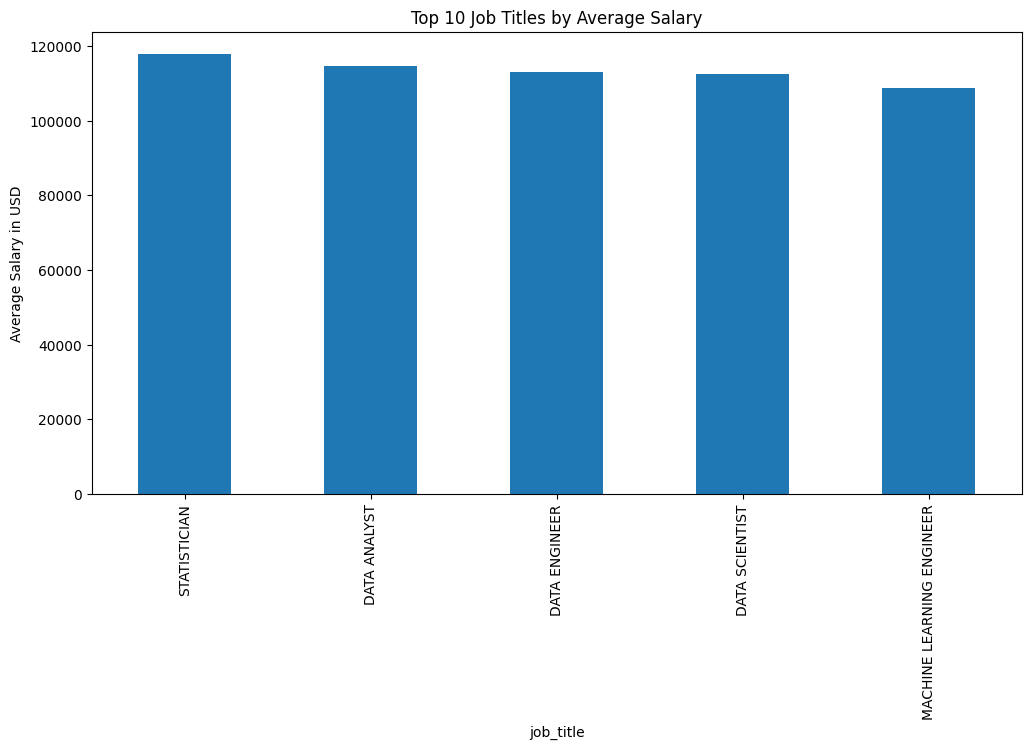

In [233]:
# Top 10 job titles by average salary
top_jobs_by_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_jobs_by_salary.plot(kind='bar', figsize=(12, 6), title='Top 10 Job Titles by Average Salary')
plt.ylabel('Average Salary in USD')
plt.show()


# **Feature Engineering**

**Normalize Salary Across Regions**

In [234]:
# Comprehensive cost-of-living index for countries
cost_of_living_index = {
    'US': 1.0, 'MX': 0.8, 'CN': 0.7, 'DE': 0.9, 'IN': 0.5, 'UK': 1.1, 'CA': 1.0, 'FR': 1.0,
    'AU': 1.1, 'BR': 0.6, 'JP': 1.2, 'SG': 1.3, 'ZA': 0.7, 'IT': 0.9, 'ES': 0.8, 'RU': 0.6,
    'SE': 1.2, 'NO': 1.4, 'CH': 1.5, 'NL': 1.0, 'KR': 1.0, 'TR': 0.5, 'PL': 0.7, 'AR': 0.4,
    'EG': 0.3, 'NG': 0.3, 'ID': 0.4, 'PK': 0.3, 'VN': 0.4, 'MY': 0.5, 'PH': 0.5, 'TH': 0.6,
    'NZ': 1.1, 'IE': 1.2, 'BE': 1.0, 'AT': 1.0, 'DK': 1.3, 'FI': 1.1, 'PT': 0.8, 'GR': 0.8,
    'HU': 0.7, 'CZ': 0.8, 'RO': 0.6, 'BG': 0.5, 'SK': 0.8, 'HR': 0.8, 'SI': 0.9, 'UA': 0.4,
    'IL': 1.3, 'AE': 1.2, 'SA': 0.8, 'QA': 1.1, 'KW': 1.2, 'BH': 1.0, 'OM': 0.9, 'IR': 0.4,
    'IQ': 0.4, 'CL': 0.7, 'CO': 0.6, 'PE': 0.5, 'VE': 0.3, 'UY': 0.7, 'EC': 0.5, 'BO': 0.4,
    'PY': 0.4, 'CU': 0.5, 'DO': 0.5, 'CR': 0.7, 'PA': 0.7, 'GT': 0.5, 'HN': 0.4, 'SV': 0.4,
    'NI': 0.4, 'HT': 0.3
}

# Adjust salary based on the cost-of-living index
df['cost_of_living_adjusted_salary'] = df.apply(
    lambda x: x['salary_in_usd'] / cost_of_living_index.get(x['employee_residence'], 1.0),
    axis=1
)

print("Cost-of-living adjusted salary added to the dataset.")


Cost-of-living adjusted salary added to the dataset.


**Encode Experience Levels**

In [235]:
experience_mapping = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)


**Extract Job Title Categories**

In [236]:
# Simplify job titles into categories
job_title_mapping = {
    'DATA SCIENTIST': 'DATA SCIENCE',
    'DATA ANALYST': 'ANALYSIS',
    'MACHINE LEARNING ENGINEER': 'ML/AI',
}
df['job_title_category'] = df['job_title'].map(job_title_mapping).fillna('OTHER')


**Create Interaction Features**

In [237]:
# experience_level_encoded is numeric
df['experience_level_encoded'] = df['experience_level_encoded'].astype(float)

# Map company_size and ensure it is numeric
df['company_size_mapped'] = df['company_size'].map({'S': 1, 'M': 2, 'L': 3}).astype(float)

# Interaction between experience level and make it size
df['experience_company_interaction'] = df['experience_level_encoded'] * df['company_size_mapped']

# Map employment_type and work_setting, and make it numeric
employment_mapping = {'FT': 1, 'PT': 0.5, 'CT': 0.75, 'FL': 0.6}
work_setting_mapping = {'REMOTE': 1, 'IN-OFFICE': 0.8, 'HYBRID': 0.9}

df['employment_type_mapped'] = df['employment_type'].map(employment_mapping).astype(float)
df['work_setting_mapped'] = df['work_setting'].map(work_setting_mapping).astype(float)

# Interaction between employment type and work setting
df['employment_work_interaction'] = df['employment_type_mapped'] * df['work_setting_mapped']


**Create Binary Indicators for Categories**

In [238]:
# One-hot encoding for job category
df = pd.get_dummies(df, columns=['job_category'], prefix='job_category')

# One-hot encoding for company location
df = pd.get_dummies(df, columns=['company_location'], prefix='company_location')


**Year-Based Features**

In [239]:
# Normalize the year to show how recent the record is
df['year_normalized'] = df['work_year'] - df['work_year'].min()


**Target Transformation**

In [240]:
import numpy as np
# Log-transform salary for modeling
df['log_salary_in_usd'] = np.log1p(df['salary_in_usd'])


# **Evaluate Feature Importance**

In [241]:
from sklearn.ensemble import RandomForestRegressor

# Select numeric features and target
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['salary_in_usd', 'log_salary_in_usd'])
y = df['log_salary_in_usd']

# Fit a Random Forest to estimate feature importance
model = RandomForestRegressor()
model.fit(X, y)

# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                          Feature  Importance
2  cost_of_living_adjusted_salary    0.874770
1                          salary    0.055597
8     employment_work_interaction    0.019447
5  experience_company_interaction    0.011707
6          employment_type_mapped    0.009361
4             company_size_mapped    0.007401
9                 year_normalized    0.006052
7             work_setting_mapped    0.005954
0                       work_year    0.005851
3        experience_level_encoded    0.003859


# **Feature Selection Based on Correlation, Importance, and Variance Analysis**

In [242]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check if the target column 'log_salary_in_usd' is in the filtered DataFrame
if 'log_salary_in_usd' not in numerical_df.columns:
    print("Error: 'log_salary_in_usd' is not present in the numerical columns.")
else:
    # Correlation with log-transformed salary
    correlation = numerical_df.corr()['log_salary_in_usd'].sort_values(ascending=False)
    print("Correlation with log-transformed salary:\n", correlation)


Correlation with log-transformed salary:
 log_salary_in_usd                 1.000000
salary_in_usd                     0.973832
cost_of_living_adjusted_salary    0.772952
company_size_mapped               0.027380
experience_company_interaction    0.024493
salary                            0.023026
work_setting_mapped               0.009228
experience_level_encoded          0.002026
employment_work_interaction      -0.000038
work_year                        -0.006592
year_normalized                  -0.006592
employment_type_mapped           -0.010185
Name: log_salary_in_usd, dtype: float64


# **Variance Analysis**

In [243]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Variance calculation
variance = numerical_df.var().sort_values(ascending=False)
print("Feature Variance:\n", variance)

# Threshold for low variance, Set a threshold
low_variance_threshold = 0.01  #
low_variance_features = variance[variance < low_variance_threshold].index
print("Low-variance features to drop:", low_variance_features)

# Drop low-variance features
df = df.drop(columns=low_variance_features)



Feature Variance:
 cost_of_living_adjusted_salary    5.885933e+09
salary_in_usd                     2.430443e+09
salary                            2.407263e+09
experience_company_interaction    2.726389e+00
company_size_mapped               6.697281e-01
year_normalized                   6.641880e-01
work_year                         6.641880e-01
log_salary_in_usd                 2.592005e-01
experience_level_encoded          2.494764e-01
employment_type_mapped            3.589712e-02
employment_work_interaction       3.404311e-02
work_setting_mapped               2.490945e-03
dtype: float64
Low-variance features to drop: Index(['work_setting_mapped'], dtype='object')


# **Final Feature Selection**

In [244]:
# Combining the approaches
selected_features = ['cost_of_living_adjusted_salary', 'salary', 'employment_work_interaction']

# Drop features not in the selected list
X = df[selected_features]
y = df['log_salary_in_usd']

print("Final selected features for modeling:", selected_features)


Final selected features for modeling: ['cost_of_living_adjusted_salary', 'salary', 'employment_work_interaction']


# **Model Selection and Testing**

**Data Preparation**

In [245]:
from sklearn.model_selection import train_test_split

# Select features (X) and target variable (y)
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['salary_in_usd', 'log_salary_in_usd'])
y = df['log_salary_in_usd']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and testing data prepared.")


Training and testing data prepared.


# **Train Basic Models**

In [246]:
# Check for missing values in training and testing sets
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())


Missing values in X_train:
 work_year                           0
salary                              0
cost_of_living_adjusted_salary      0
experience_level_encoded            0
company_size_mapped                 0
experience_company_interaction      0
employment_type_mapped              0
employment_work_interaction       611
year_normalized                     0
dtype: int64
Missing values in X_test:
 work_year                           0
salary                              0
cost_of_living_adjusted_salary      0
experience_level_encoded            0
company_size_mapped                 0
experience_company_interaction      0
employment_type_mapped              0
employment_work_interaction       166
year_normalized                     0
dtype: int64


In [247]:
from sklearn.impute import SimpleImputer

# Initialize an imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the interaction column
X_train['employment_work_interaction'] = imputer.fit_transform(X_train[['employment_work_interaction']])
X_test['employment_work_interaction'] = imputer.transform(X_test[['employment_work_interaction']])


**Linear Regression**

In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R2 Score: {linear_r2}")


Linear Regression Performance:
Mean Squared Error: 0.10396488706052312
R2 Score: 0.5981454936099722


**Random Forest Regressor**

In [249]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R2 Score: {rf_r2}")


Random Forest Regressor Performance:
Mean Squared Error: 0.0586757301571136
R2 Score: 0.7732012485558246


**Gradient Boosting Regressor**

In [250]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R2 Score: {gb_r2}")


Gradient Boosting Regressor Performance:
Mean Squared Error: 0.053995229889462794
R2 Score: 0.7912927425005085


**Model Comparison**

In [251]:
# Compare MSE and R2 scores of all models
results = {
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "Mean Squared Error": [linear_mse, rf_mse, gb_mse],
    "R2 Score": [linear_r2, rf_r2, gb_r2]
}

import pandas as pd
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)


Model Comparison:
               Model  Mean Squared Error  R2 Score
0  Linear Regression            0.103965  0.598145
1      Random Forest            0.058676  0.773201
2  Gradient Boosting            0.053995  0.791293


**Perform hyperparameter tuning on selected models.**

**Random Forest: Hyperparameter Tuning**

In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the search
rf_random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
rf_best_model = rf_random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 5}


**Gradient Boosting: Hyperparameter Tuning**

In [253]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up RandomizedSearchCV
gb_random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=3,       # 3-fold cross-validation
    verbose=2,
    random_state=42,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Perform the search
gb_random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
gb_best_model = gb_random_search.best_estimator_


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for Gradient Boosting: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.01}


**Evaluate the Tuned Models**

In [254]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Random Forest
rf_y_pred = rf_best_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Tuned Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

# Evaluate Gradient Boosting
gb_y_pred = gb_best_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
print(f"Tuned Gradient Boosting - MSE: {gb_mse}, R2: {gb_r2}")


Tuned Random Forest - MSE: 0.05254674043455594, R2: 0.7968915752542429
Tuned Gradient Boosting - MSE: 0.052293290492742464, R2: 0.7978712329458129


**Actual vs. Predicted Values**

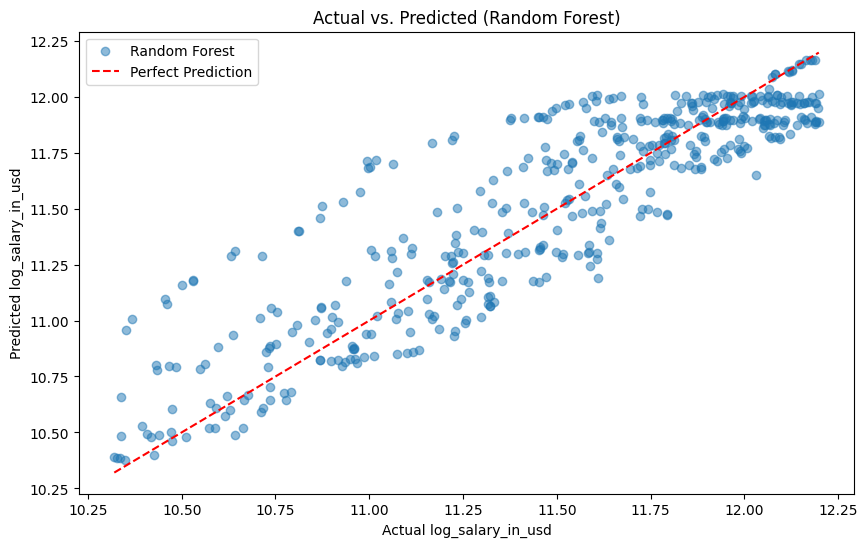

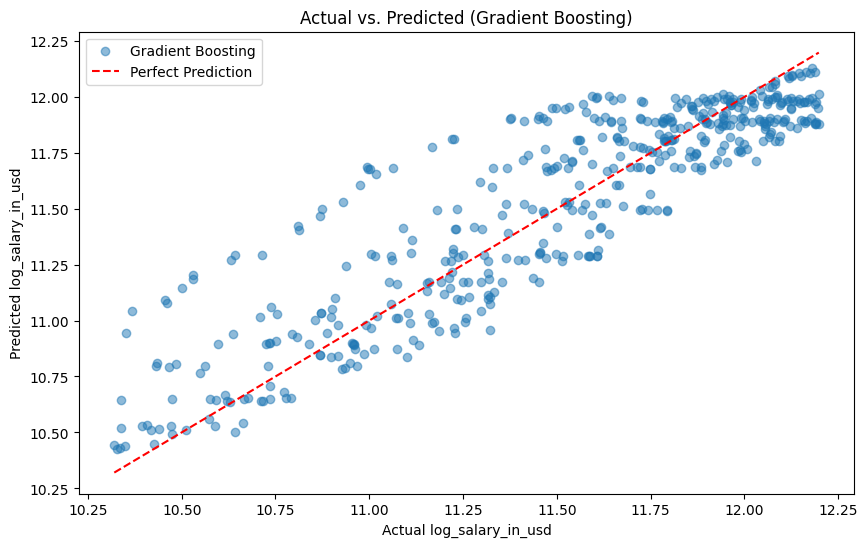

In [255]:
import matplotlib.pyplot as plt

# Predict values using the tuned models
rf_y_pred = rf_best_model.predict(X_test)
gb_y_pred = gb_best_model.predict(X_test)

# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5, label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Random Forest)')
plt.xlabel('Actual log_salary_in_usd')
plt.ylabel('Predicted log_salary_in_usd')
plt.legend()
plt.show()

# Scatter plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.5, label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted (Gradient Boosting)')
plt.xlabel('Actual log_salary_in_usd')
plt.ylabel('Predicted log_salary_in_usd')
plt.legend()
plt.show()


**Residual Analysis**

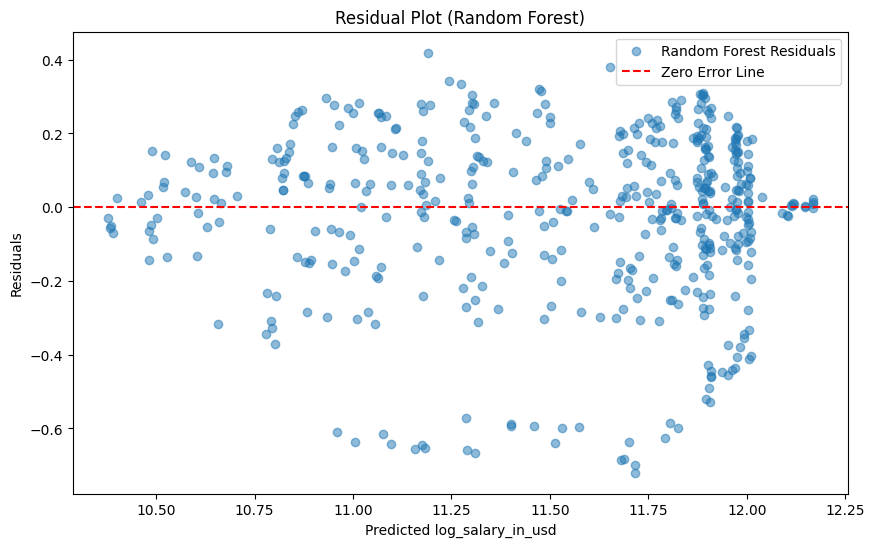

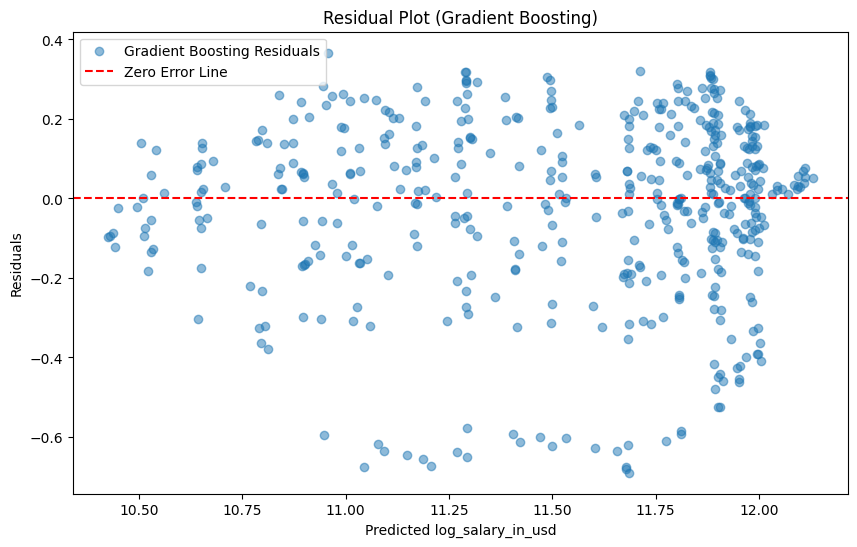

In [256]:
# Residuals for Random Forest
rf_residuals = y_test - rf_y_pred

plt.figure(figsize=(10, 6))
plt.scatter(rf_y_pred, rf_residuals, alpha=0.5, label='Random Forest Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted log_salary_in_usd')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Residuals for Gradient Boosting
gb_residuals = y_test - gb_y_pred

plt.figure(figsize=(10, 6))
plt.scatter(gb_y_pred, gb_residuals, alpha=0.5, label='Gradient Boosting Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.title('Residual Plot (Gradient Boosting)')
plt.xlabel('Predicted log_salary_in_usd')
plt.ylabel('Residuals')
plt.legend()
plt.show()


**Feature Importance Visualization**

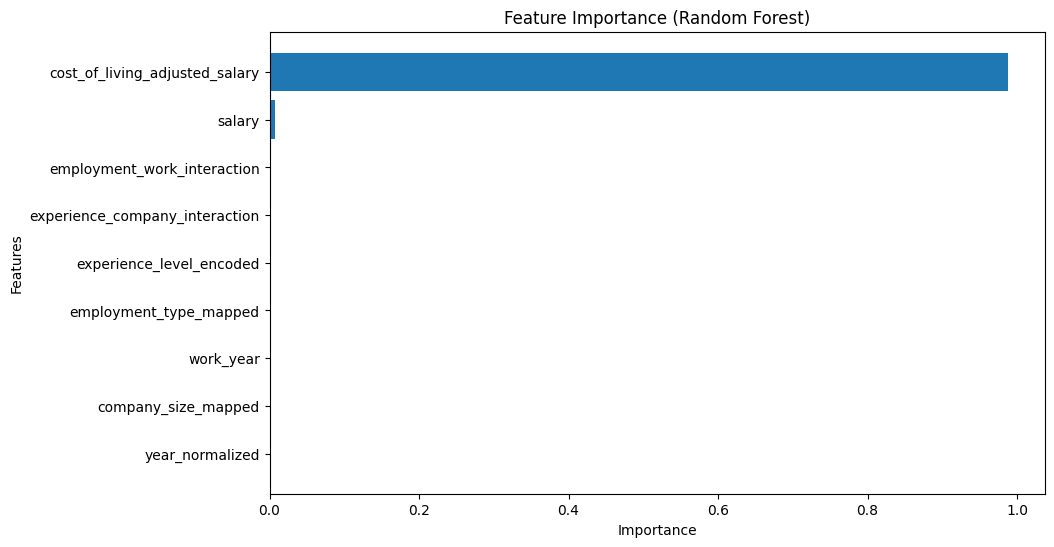

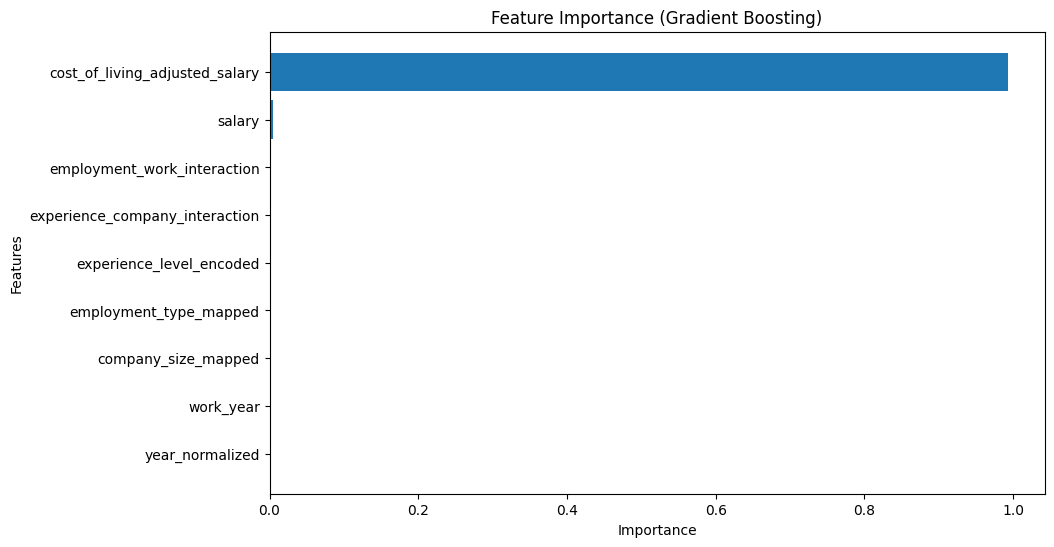

In [257]:
import pandas as pd

# Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_best_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()

# Gradient Boosting Feature Importance
gb_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_best_model.feature_importances_})
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(gb_feature_importance['Feature'], gb_feature_importance['Importance'])
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

**Model Performance Comparison**

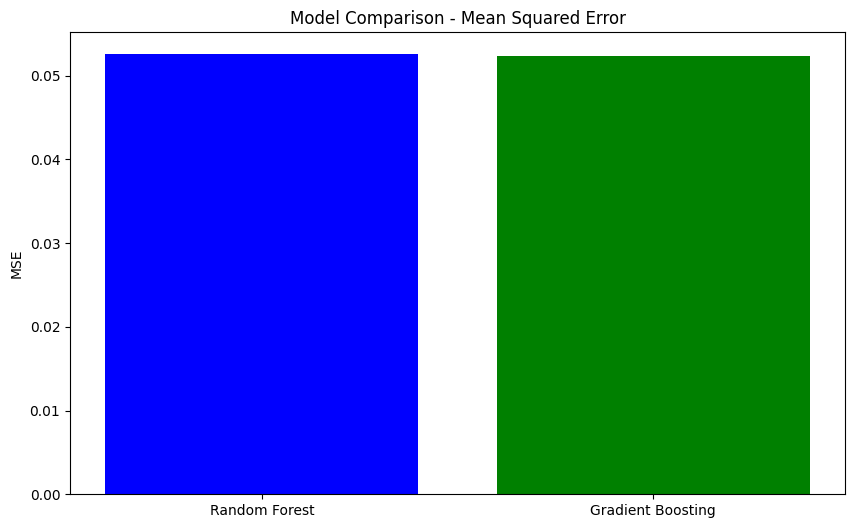

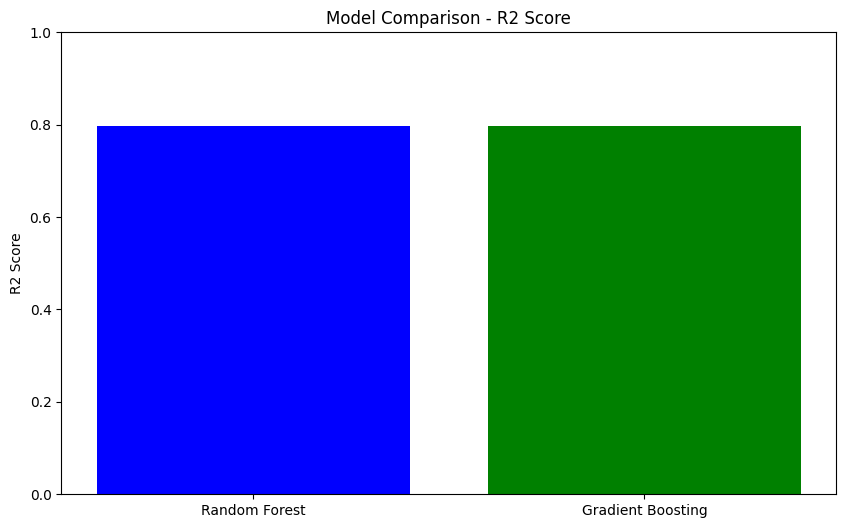

In [258]:
import numpy as np

# Model results
models = ['Random Forest', 'Gradient Boosting']
mse_scores = [rf_mse, gb_mse]
r2_scores = [rf_r2, gb_r2]

# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'green'])
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.show()

# Bar chart for R2 Score
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # R2 score range is [0, 1]
plt.show()


In [259]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(gb_best_model, 'model.pkl')
print("Model saved as model.pkl")

Model saved as model.pkl
